In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('clown_fish.png')

Text(0.5, 1.0, 'Original Image')

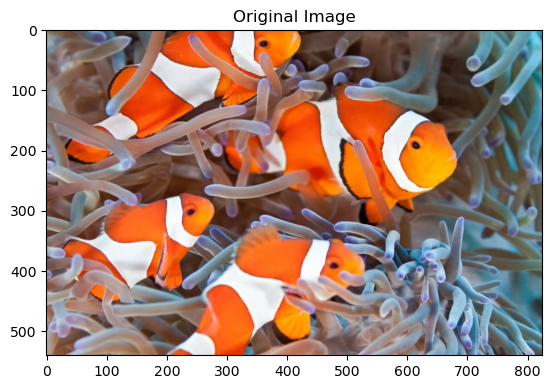

In [3]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')

In [4]:
img_flatten = img_rgb.flatten()

In [5]:
data = img_rgb.reshape((-1, 3))
data = np.float32(data)

In [6]:
k = 4

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [8]:
ret, labels, centres = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
centres

array([[235.61021 ,  98.850075,  22.369156],
       [215.42522 , 219.81935 , 226.47672 ],
       [ 89.716965,  71.37467 ,  63.853607],
       [140.6075  , 137.23953 , 143.53548 ]], dtype=float32)

In [10]:
segmented_labels = labels.reshape(img_rgb.shape[0], img_rgb.shape[1])

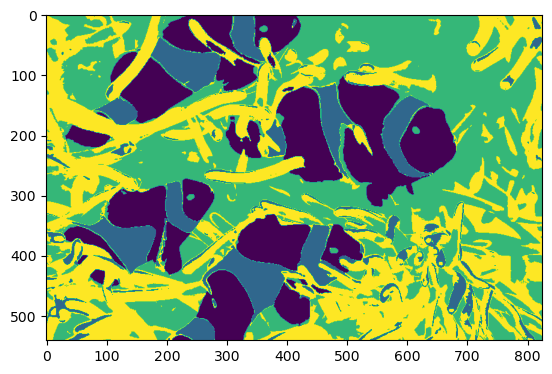

In [11]:
plt.imshow(segmented_labels)

In [12]:
cluster_mask = []

for i in range(k):
    mask = (segmented_labels == i)
    cluster_mask.append(mask)

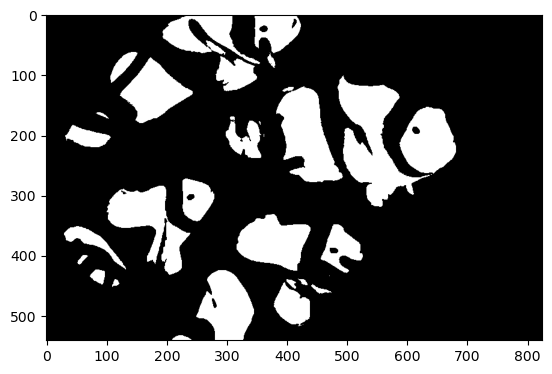

In [13]:
plt.imshow(cluster_mask[0], cmap = 'gray')

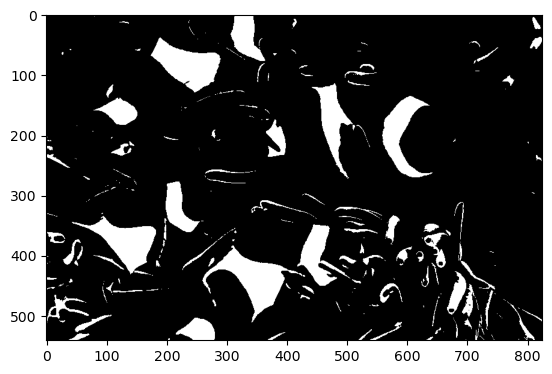

In [17]:
plt.imshow(cluster_mask[1], cmap = 'gray')

In [15]:
cluster_mask_images = []

for i, mask in enumerate(cluster_mask):
    cluster_color = centres[i]
    cluster_mask_rgb = np.zeros_like(img_rgb)
    cluster_mask_rgb[mask] = cluster_color
    cluster_mask_images.append(cluster_mask_rgb)

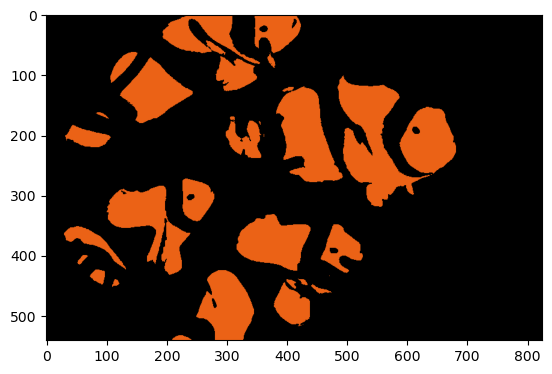

In [16]:
plt.imshow(cluster_mask_images[0], cmap = 'gray')

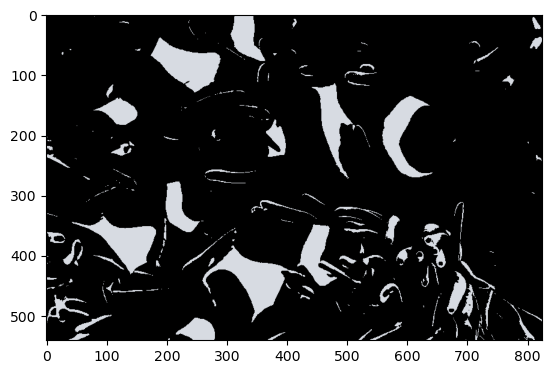

In [18]:
plt.imshow(cluster_mask_images[1], cmap = 'gray')

In [22]:
merged_mask = cluster_mask_images[0] ^ cluster_mask_images[1]
merged_mask_rgb = np.zeros_like(img_rgb)
merged_mask_rgb[merged_mask] = img_rgb[merged_mask]

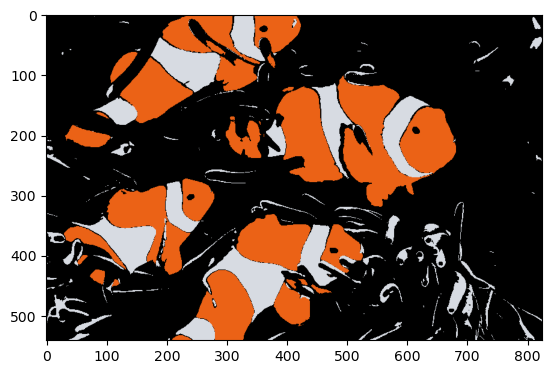

In [23]:
plt.imshow(merged_mask)